In [1]:
import pandas as pd
import numpy as np
import sounddevice as sd
import soundfile as sf
import librosa
import os
import sys
from multiprocessing import Pool
import matplotlib.pyplot as plt
import re

In [2]:
def get_wav_duration(filename):
    return librosa.get_duration(path=filename)

def get_sample_rate(filename):
    with sf.SoundFile(filename) as audio:
        return audio.samplerate

In [3]:
def play_wav(filename, device_id=None, volume=1.0, duration=3):
    """
    Play a WAV file for a specific duration on a specific device with adjustable volume.

    Parameters:
    - filename: Path to the WAV file
    - device_id: Index of the audio output device (None = default)
    - volume: Volume multiplier (1.0 = normal, 0.5 = half, 2.0 = double)
    - duration: Duration to play in seconds (default is 3 seconds)
    """
    # Read the audio file
    data, samplerate = sf.read(filename)

    # Adjust the volume (Ensure values stay in range [-1, 1])
    data = np.clip(data * volume, -1.0, 1.0)

    # Calculate the number of samples to play based on the desired duration
    num_samples = int(samplerate * duration)

    # Slice the data to only include the first `duration` seconds
    data = data[:num_samples]

    # Play the modified audio
    sd.play(data, samplerate, device=device_id)
    sd.wait()  # Wait until playback is done

In [4]:
test_file = r"H:\DSP_project\ignoredir\data_test\Recording.wav"

In [7]:
play_wav(test_file, device_id=7, volume=0.2, duration=10)


In [169]:
get_wav_duration(test_file)


4.45

# Dataset 1

In [170]:
path = r"H:\DSP_project\ignoredir\dataset\archive\music_dataset"

data = []
for folder in os.listdir(path):
    folder_path = os.path.join(path, folder)
    if os.path.isdir(folder_path):  # Ensure it's a folder
        files = os.listdir(folder_path)  # List only files in the folder
        data.extend([(os.path.join(folder_path, file), folder) for file in files])
        
df1 = pd.DataFrame(data, columns=["fname", "Class"])
df1.sort_values("Class", inplace= True)   
df1.reset_index(inplace=True, drop=True)

df1["duration"] = df1["fname"].map(get_wav_duration)

# with Pool(processes=6) as pool:  # Use only real cores
#     test["duration"] = list(pool.imap_unordered(get_wav_duration, test["fname"]))

In [171]:
display(df1.sample(10))
print("shape:", df1.shape)
print("class: ",df1["Class"].unique())
print("class amount: ", len(df1["Class"].unique()))
display(df1["duration"].describe())

,fname,Class,duration
16521,H:\DSP_project\ignoredir\dataset\archive\music...,Drum_set,3.0
6051,H:\DSP_project\ignoredir\dataset\archive\music...,Acoustic_Guitar,3.0
3627,H:\DSP_project\ignoredir\dataset\archive\music...,Acoustic_Guitar,3.0
35630,H:\DSP_project\ignoredir\dataset\archive\music...,Trumpet,3.0
30828,H:\DSP_project\ignoredir\dataset\archive\music...,Shakers,3.0
42215,H:\DSP_project\ignoredir\dataset\archive\music...,vibraphone,3.0
1811,H:\DSP_project\ignoredir\dataset\archive\music...,Accordion,3.0
38576,H:\DSP_project\ignoredir\dataset\archive\music...,flute,3.0
32022,H:\DSP_project\ignoredir\dataset\archive\music...,Tambourine,3.0
11058,H:\DSP_project\ignoredir\dataset\archive\music...,Bass_Guitar,3.0


shape: (42311, 3)
class:  ['Accordion' 'Acoustic_Guitar' 'Banjo' 'Bass_Guitar' 'Clarinet' 'Cymbals'
 'Dobro' 'Drum_set' 'Electro_Guitar' 'Floor_Tom' 'Harmonica' 'Harmonium'
 'Hi_Hats' 'Horn' 'Keyboard' 'Mandolin' 'Organ' 'Piano' 'Saxophone'
 'Shakers' 'Tambourine' 'Trombone' 'Trumpet' 'Ukulele' 'Violin' 'cowbell'
 'flute' 'vibraphone']
class amount:  28


count    42311.0
mean         3.0
std          0.0
min          3.0
25%          3.0
50%          3.0
75%          3.0
max          3.0
Name: duration, dtype: float64

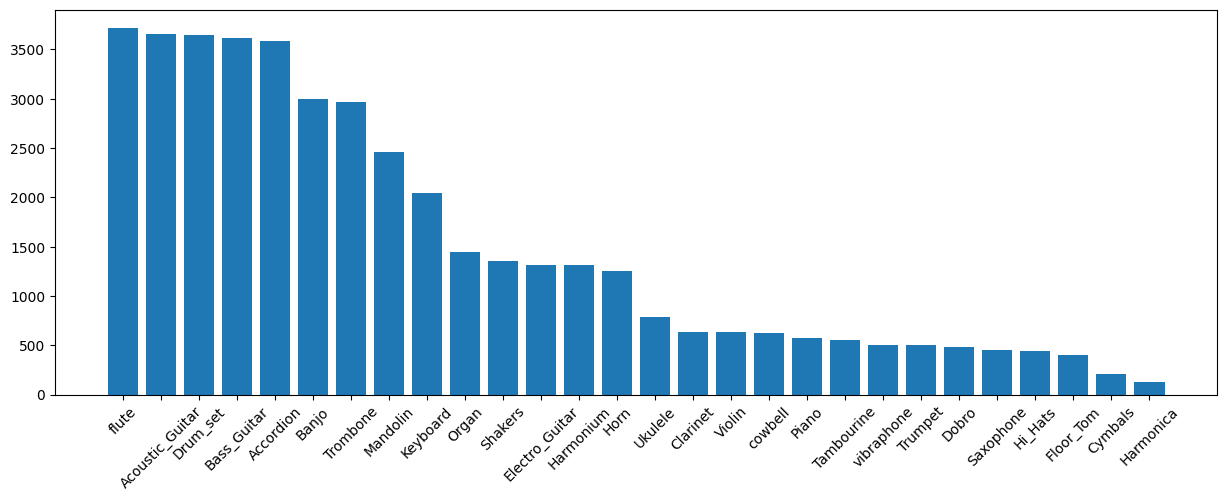

In [172]:
test = df1.value_counts("Class")
plt.figure(figsize=(15,5))
plt.bar(test.index, test, )
plt.xticks(rotation=45)
plt.show()

# Dataset 2

## train

In [173]:
path = r"H:\DSP_project\ignoredir\dataset\archive2\Metadata_Train.csv"
df2 = pd.read_csv(path)
# df.drop_duplicates("FileName", keep=False, inplace=True)
display(df2.sample(10))
print("shape:", df2.shape)
print("class: ",df2["Class"].unique())
print("class amount: ", len(df2["Class"].unique()))


,FileName,Class
1268,WaveDrum02_45SD (100).wav,Sound_Drum
2171,piano-normal-d4wav-14838.wav,Sound_Piano
336,G53-57402-1111-276.wav,Sound_Guitar
1032,WaveDrum02_39KD (128).wav,Sound_Drum
497,LP_D_fret_0-20.wav,Sound_Guitar
2477,ROOM_room6_MUS_beethoven2_DEV_redmi.wav,Sound_Piano
355,G53-60405-1111-00123.wav,Sound_Guitar
898,loop-12-107632.wav,Sound_Drum
2539,ROOM_room7_MUS_mozart_DEV_ipad.wav,Sound_Piano
50,AR_Lick1_MVSDN.wav,Sound_Guitar


shape: (2629, 2)
class:  ['Sound_Guitar' 'Sound_Drum' 'Sound_Violin' 'Sound_Piano']
class amount:  4


In [174]:
path = r"H:\DSP_project\ignoredir\dataset\archive2\Train_submission\Train_submission"
print("file number: ", len(os.listdir(path)))
sub_df2 = pd.DataFrame({"fname":[os.path.join(path, file) for file in os.listdir(path)]})
sub_df2["FileName"] = sub_df2["fname"].map(lambda cell: os.path.split(cell)[-1])
sub_df2["duration"] = sub_df2["fname"].map(get_wav_duration)
# sub_df.drop("fname", axis=1, inplace=True)
sub_df2

file number:  2628


,fname,FileName,duration
0,H:\DSP_project\ignoredir\dataset\archive2\Trai...,029500_morning-rain-piano-65875.wav,38.712000
1,H:\DSP_project\ignoredir\dataset\archive2\Trai...,035568_upright-piano-71570.wav,28.512000
2,H:\DSP_project\ignoredir\dataset\archive2\Trai...,04-47367.wav,7.440000
3,H:\DSP_project\ignoredir\dataset\archive2\Trai...,046578_tribal-drum-rhythms-03wav-68096.wav,16.008000
4,H:\DSP_project\ignoredir\dataset\archive2\Trai...,054399_8039s-old-school-rap-drum-loop-80433.wav,10.728000
...,...,...,...
2623,H:\DSP_project\ignoredir\dataset\archive2\Trai...,WaveDrum02_45SD (95).wav,14.860771
2624,H:\DSP_project\ignoredir\dataset\archive2\Trai...,WaveDrum02_45SD (96).wav,17.089887
2625,H:\DSP_project\ignoredir\dataset\archive2\Trai...,WaveDrum02_45SD (97).wav,17.846848
2626,H:\DSP_project\ignoredir\dataset\archive2\Trai...,WaveDrum02_45SD (98).wav,12.923084


In [175]:
dup_df2 = df2[df2["FileName"].duplicated(keep="first")].sort_values("FileName").copy()
dup_df2.loc[dup_df2["FileName"].str.contains("drum",regex=True, case=False), "NewClass"] = "Sound_Drum"
dup_df2.loc[dup_df2["FileName"].str.contains("violin",regex=True, case=False), "NewClass"] = "Sound_Violin"
dup_df2.loc[dup_df2["FileName"].str.contains("piano",regex=True, case=False), "NewClass"] = "Sound_Piano"
dup_df2 = dup_df2.dropna()
dup_df2["Class"] = dup_df2["NewClass"]
dup_df2 = dup_df2[["FileName", "Class"]]


df2 = df2.drop_duplicates("FileName", keep=False)
df2 = pd.concat([df2,dup_df2])
df2 = df2.reset_index(drop=True)
display(df2.value_counts("Class"))
df2

Class
Sound_Guitar    700
Sound_Drum      619
Sound_Piano     528
Name: count, dtype: int64

,FileName,Class
0,1-E1-Major 00.wav,Sound_Guitar
1,1-E1-Major 01.wav,Sound_Guitar
2,1-E1-Major 02.wav,Sound_Guitar
3,1-E1-Major 03.wav,Sound_Guitar
4,1-E1-Major 04.wav,Sound_Guitar
...,...,...
1842,lckk_118_drum_01_full-43553.wav,Sound_Drum
1843,marching-drums-drum-solo2-fx-99061.wav,Sound_Drum
1844,odddrumloop-91606.wav,Sound_Drum
1845,on-rd-bruce-drums-1-89708.wav,Sound_Drum


In [176]:
df2 = pd.merge(left=sub_df2, right=df2, how="left", on="FileName")
df2.sample(10)

,fname,FileName,duration,Class
1700,H:\DSP_project\ignoredir\dataset\archive2\Trai...,the-last-piano-112677.wav,35.761633,Sound_Piano
954,H:\DSP_project\ignoredir\dataset\archive2\Trai...,LP_Lick4_FN.wav,7.380317,Sound_Guitar
1889,H:\DSP_project\ignoredir\dataset\archive2\Trai...,violin_sound (222).wav,8.551497,NaN
346,H:\DSP_project\ignoredir\dataset\archive2\Trai...,classical_6_100BPM.wav,28.800000,Sound_Guitar
173,H:\DSP_project\ignoredir\dataset\archive2\Trai...,2_emil-telmanyi_bwv1001.wav,60.000000,NaN
1263,H:\DSP_project\ignoredir\dataset\archive2\Trai...,ROOM_room2_MUS_scale_DEV_iphone.wav,33.750000,Sound_Piano
587,H:\DSP_project\ignoredir\dataset\archive2\Trai...,funk-bitxl-op-i1-34289.wav,15.672000,NaN
49,H:\DSP_project\ignoredir\dataset\archive2\Trai...,1-E1-Major 10.wav,2.500000,Sound_Guitar
1534,H:\DSP_project\ignoredir\dataset\archive2\Trai...,ROOM_room7_MUS_swing_DEV_lg.wav,25.500000,Sound_Piano
2240,H:\DSP_project\ignoredir\dataset\archive2\Trai...,WaveDrum02_39KD (11).wav,13.333333,Sound_Drum


In [177]:
def fill_violin_class(row):
    if re.findall("violin", row["FileName"], flags=re.IGNORECASE):
        return "Sound_Violin"
    else:
        return row["Class"]

df2.loc[df2["Class"].isna(),"Class"] = df2.loc[df2["Class"].isna()].apply(fill_violin_class, axis=1)
display(df2.value_counts("Class"))
print(df2.shape)

Class
Sound_Guitar    700
Sound_Drum      619
Sound_Piano     528
Sound_Violin    387
Name: count, dtype: int64

(2628, 4)


In [178]:
df2.isna().sum()

fname         0
FileName      0
duration      0
Class       394
dtype: int64

In [179]:
# match_class = {k:v for k,v in zip(["d", "v", "g", "p"], ["Sound_Drum", "Sound_Violin", "Sound_Guitar", "Sound_Piano"])}
# def fill_manual_class(row):
#     while True:
#         play_wav(row["fname"], device_id=7, volume=0.5, duration=3)
#         code = input(f"row{row.name} {row.FileName}: ")
#         if code not in ["d", "v", "g", "p", "n"]:
#             continue
#         elif code == "n":
#                 return row["Class"]
#         label = match_class[code]
#         return label

# df_merge.loc[df_merge["Class"].isna(),"Class"] = df_merge.loc[df_merge["Class"].isna()].apply(fill_manual_class, axis=1)

df2 = df2.dropna()

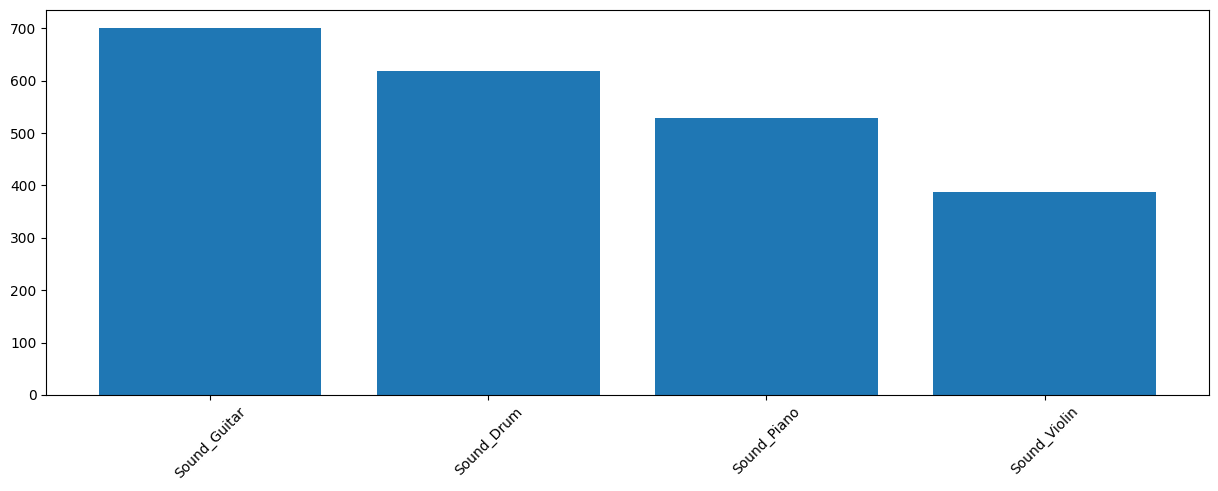

In [180]:
test = df2.value_counts("Class")
plt.figure(figsize=(15,5))
plt.bar(test.index, test, )
plt.xticks(rotation=45)
plt.show()

## test

In [207]:
path = r"H:\DSP_project\ignoredir\dataset\archive2\Metadata_Test.csv"
df3 = pd.read_csv(path)
display(df3.sample(10))
print("shape:", df3.shape)
print("class: ",df3["Class"].unique())
print("class amount: ", len(df3["Class"].unique()))

,FileName,Class
13,rock_4_110BPM.wav,Sound_Guiatr
78,wondercue-111933.wav,Sound_Piano
6,guitar-song-57789.wav,Sound_Guiatr
22,hip-hop-drum-loop-22-33572.wav,Sound_Drum
61,ROOM-room8-MUS-beethoven2.wav,Sound_Piano
18,ska_1_150BPM.wav,Sound_Guiatr
55,Va-ord-F4-mf-3c.wav,Sound_Violin
53,Va-ord-F3-mf-4c.wav,Sound_Violin
3,guitar-solo-27194.wav,Sound_Guiatr
54,Va-ord-F4-ff-2c.wav,Sound_Violin


shape: (80, 2)
class:  ['Sound_Guiatr' 'Sound_Drum' 'Sound_Violin' 'Sound_Piano']
class amount:  4


In [208]:
df3[df3["FileName"].duplicated(keep=False)].sort_values("FileName").head(10)

,FileName,Class


In [209]:
path = r"H:\DSP_project\ignoredir\dataset\archive2\Test_submission\Test_submission"
print("file number: ", len(os.listdir(path)))
sub_df3 = pd.DataFrame({"fname":[os.path.join(path, file) for file in os.listdir(path)]})
sub_df3["FileName"] = sub_df3["fname"].map(lambda cell: os.path.split(cell)[-1])
sub_df3["duration"] = sub_df3["fname"].map(get_wav_duration)
# sub_df.drop("fname", axis=1, inplace=True)
sub_df3

file number:  80


,fname,FileName,duration
0,H:\DSP_project\ignoredir\dataset\archive2\Test...,100bpm-808-like-drum-loop-74838.wav,19.272000
1,H:\DSP_project\ignoredir\dataset\archive2\Test...,acoustic-guitar-logo-13084.wav,5.982041
2,H:\DSP_project\ignoredir\dataset\archive2\Test...,darbuka-drum-percussion-64018.wav,31.425306
3,H:\DSP_project\ignoredir\dataset\archive2\Test...,guitar-chords-70663.wav,16.848000
4,H:\DSP_project\ignoredir\dataset\archive2\Test...,guitar-intro-110935.wav,22.200000
...,...,...,...
75,H:\DSP_project\ignoredir\dataset\archive2\Test...,whatever-you-say-piano-27291.wav,21.096000
76,H:\DSP_project\ignoredir\dataset\archive2\Test...,wingrandpiano-96338.wav,3.840000
77,H:\DSP_project\ignoredir\dataset\archive2\Test...,wondercue-111933.wav,29.805714
78,H:\DSP_project\ignoredir\dataset\archive2\Test...,world-drum-beat-76217.wav,24.072000


In [210]:
df3 = pd.merge(left=sub_df3, right=df3, how="left", on="FileName")
df3.sample(10)

,fname,FileName,duration,Class
40,H:\DSP_project\ignoredir\dataset\archive2\Test...,ROOM_room6_MUS_pachelbel_DEV_amazon.wav,38.999977,Sound_Piano
43,H:\DSP_project\ignoredir\dataset\archive2\Test...,ROOM_room7_MUS_beethoven1_DEV_amazon.wav,41.562494,Sound_Piano
12,H:\DSP_project\ignoredir\dataset\archive2\Test...,hip-hop-drum-loop-25-33571.wav,24.960000,Sound_Drum
29,H:\DSP_project\ignoredir\dataset\archive2\Test...,rock_4_110BPM.wav,26.181814,Sound_Guiatr
41,H:\DSP_project\ignoredir\dataset\archive2\Test...,ROOM_room6_MUS_pachelbel_DEV_iphone.wav,38.999977,Sound_Piano
20,H:\DSP_project\ignoredir\dataset\archive2\Test...,phaze-giant-bass-69687.wav,27.480000,Sound_Drum
33,H:\DSP_project\ignoredir\dataset\archive2\Test...,rock_8_100BPM.wav,38.400000,Sound_Guiatr
36,H:\DSP_project\ignoredir\dataset\archive2\Test...,ROOM-room8-MUS-chords.wav,16.847324,Sound_Piano
61,H:\DSP_project\ignoredir\dataset\archive2\Test...,time-break-drum-only-83822.wav,8.424000,Sound_Drum
24,H:\DSP_project\ignoredir\dataset\archive2\Test...,pulsing-rhythm-31775.wav,22.200000,Sound_Drum


In [211]:
df3.isna().sum()

fname       0
FileName    0
duration    0
Class       0
dtype: int64

In [214]:
df3["Class"] = df3["Class"].replace({"Sound_Guiatr" : "Sound_Guitar"})

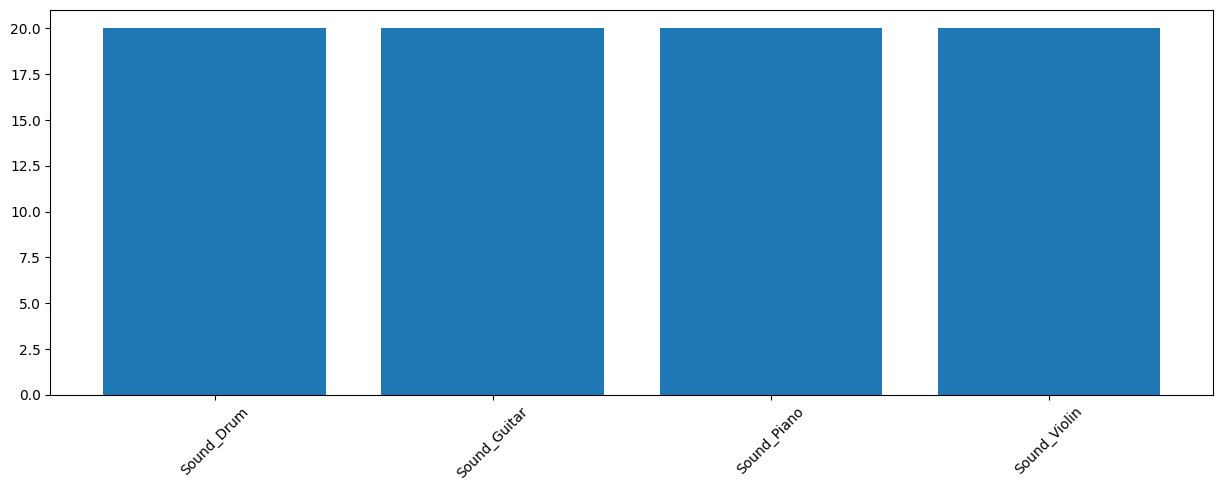

In [215]:
test = df3.value_counts("Class")
plt.figure(figsize=(15,5))
plt.bar(test.index, test, )
plt.xticks(rotation=45)
plt.show()

# Integration

In [216]:
df1.head()

,fname,Class,duration
0,H:\DSP_project\ignoredir\dataset\archive\music...,Accordion,3.0
1,H:\DSP_project\ignoredir\dataset\archive\music...,Accordion,3.0
2,H:\DSP_project\ignoredir\dataset\archive\music...,Accordion,3.0
3,H:\DSP_project\ignoredir\dataset\archive\music...,Accordion,3.0
4,H:\DSP_project\ignoredir\dataset\archive\music...,Accordion,3.0


In [217]:
df2.head()

,fname,FileName,duration,Class
0,H:\DSP_project\ignoredir\dataset\archive2\Trai...,029500_morning-rain-piano-65875.wav,38.712,Sound_Piano
1,H:\DSP_project\ignoredir\dataset\archive2\Trai...,035568_upright-piano-71570.wav,28.512,Sound_Piano
3,H:\DSP_project\ignoredir\dataset\archive2\Trai...,046578_tribal-drum-rhythms-03wav-68096.wav,16.008,Sound_Drum
4,H:\DSP_project\ignoredir\dataset\archive2\Trai...,054399_8039s-old-school-rap-drum-loop-80433.wav,10.728,Sound_Drum
5,H:\DSP_project\ignoredir\dataset\archive2\Trai...,056514_drum-40118.wav,9.720,Sound_Drum


In [218]:
df3.head()

,fname,FileName,duration,Class
0,H:\DSP_project\ignoredir\dataset\archive2\Test...,100bpm-808-like-drum-loop-74838.wav,19.272000,Sound_Drum
1,H:\DSP_project\ignoredir\dataset\archive2\Test...,acoustic-guitar-logo-13084.wav,5.982041,Sound_Guitar
2,H:\DSP_project\ignoredir\dataset\archive2\Test...,darbuka-drum-percussion-64018.wav,31.425306,Sound_Drum
3,H:\DSP_project\ignoredir\dataset\archive2\Test...,guitar-chords-70663.wav,16.848000,Sound_Guitar
4,H:\DSP_project\ignoredir\dataset\archive2\Test...,guitar-intro-110935.wav,22.200000,Sound_Guitar


#### concat df2 df3

In [219]:
df_concat1 = pd.concat([
    df2[["fname", "duration", "Class"]],
    df3[["fname", "duration", "Class"]]
])
df_concat1 = df_concat1.reset_index(drop=True)
df_concat1["Class"] = df_concat1["Class"].replace({"Sound_Drum": "Drum_set",
                                                   "Sound_Guitar": "Acoustic_Guitar",
                                                   "Sound_Violin": "Violin",
                                                   "Sound_Piano": "Piano",
                                                   })
print(df_concat1.value_counts("Class"))
display(df_concat1.head())


Class
Acoustic_Guitar    720
Drum_set           639
Piano              548
Violin             407
Name: count, dtype: int64


,fname,duration,Class
0,H:\DSP_project\ignoredir\dataset\archive2\Trai...,38.712,Piano
1,H:\DSP_project\ignoredir\dataset\archive2\Trai...,28.512,Piano
2,H:\DSP_project\ignoredir\dataset\archive2\Trai...,16.008,Drum_set
3,H:\DSP_project\ignoredir\dataset\archive2\Trai...,10.728,Drum_set
4,H:\DSP_project\ignoredir\dataset\archive2\Trai...,9.720,Drum_set


In [191]:
# for row in df_concat1[df_concat1["Class"] == "Drum"].sample(10).itertuples():
#     play_wav(row.fname, 7, 0.2, 5)

In [220]:

print(df1.value_counts("Class"))
display(df1.head())

Class
flute              3719
Acoustic_Guitar    3654
Drum_set           3648
Bass_Guitar        3613
Accordion          3581
Banjo              2998
Trombone           2965
Mandolin           2458
Keyboard           2041
Organ              1442
Shakers            1357
Electro_Guitar     1316
Harmonium          1314
Horn               1258
Ukulele             790
Clarinet            634
Violin              630
cowbell             621
Piano               575
Tambourine          558
vibraphone          506
Trumpet             503
Dobro               487
Saxophone           454
Hi_Hats             444
Floor_Tom           406
Cymbals             208
Harmonica           131
Name: count, dtype: int64


,fname,Class,duration
0,H:\DSP_project\ignoredir\dataset\archive\music...,Accordion,3.0
1,H:\DSP_project\ignoredir\dataset\archive\music...,Accordion,3.0
2,H:\DSP_project\ignoredir\dataset\archive\music...,Accordion,3.0
3,H:\DSP_project\ignoredir\dataset\archive\music...,Accordion,3.0
4,H:\DSP_project\ignoredir\dataset\archive\music...,Accordion,3.0


In [221]:
df_concat2 = pd.concat([df1, df_concat1])

In [222]:
df_concat2["fname"].duplicated().sum()

np.int64(0)

In [223]:
df_concat2 = df_concat2.sort_values("Class")
df_concat2 = df_concat2.reset_index(drop=True)
df_concat2

,fname,Class,duration
0,H:\DSP_project\ignoredir\dataset\archive\music...,Accordion,3.0
1,H:\DSP_project\ignoredir\dataset\archive\music...,Accordion,3.0
2,H:\DSP_project\ignoredir\dataset\archive\music...,Accordion,3.0
3,H:\DSP_project\ignoredir\dataset\archive\music...,Accordion,3.0
4,H:\DSP_project\ignoredir\dataset\archive\music...,Accordion,3.0
...,...,...,...
44620,H:\DSP_project\ignoredir\dataset\archive\music...,vibraphone,3.0
44621,H:\DSP_project\ignoredir\dataset\archive\music...,vibraphone,3.0
44622,H:\DSP_project\ignoredir\dataset\archive\music...,vibraphone,3.0
44623,H:\DSP_project\ignoredir\dataset\archive\music...,vibraphone,3.0


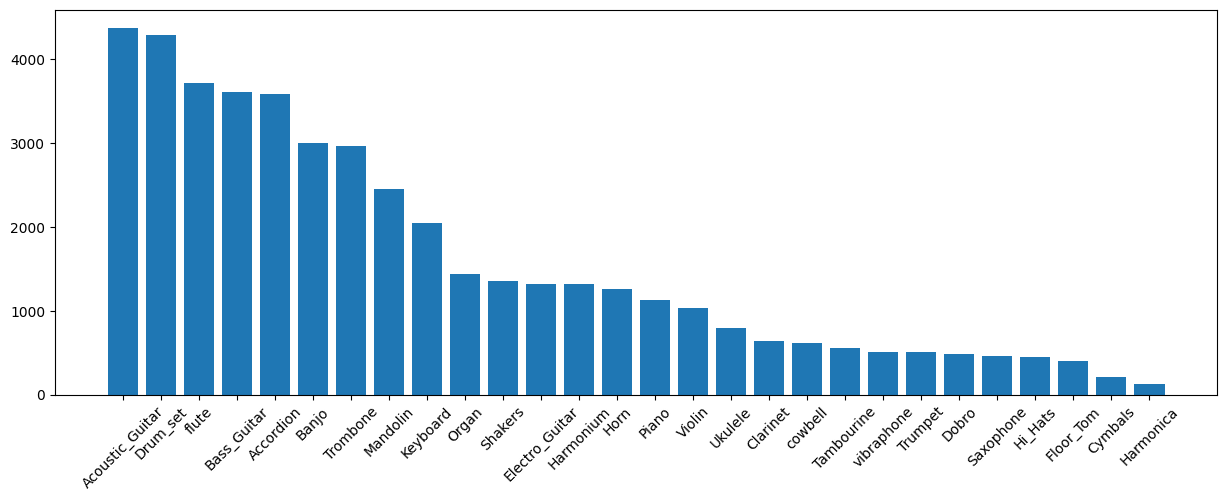

In [224]:
test = df_concat2.value_counts("Class")
plt.figure(figsize=(15,5))
plt.bar(test.index, test)
plt.xticks(rotation=45)
plt.show()

In [225]:
df_concat2.to_csv("God_data.csv")

In [ ]:
def resample_audio(input_file, target_sr=44100):
    y, sr = librosa.load(input_file, sr=target_sr)  # Resample to target_sr
    sf.write("resampled_" + input_file, y, target_sr)  # Save new file
    print(f"Resampled {input_file} to {target_sr} Hz")

In [232]:
df_concat2["fs"] = df_concat2["fname"].map(get_sample_rate)

In [235]:
df_concat2

,fname,Class,duration,fs
0,H:\DSP_project\ignoredir\dataset\archive\music...,Accordion,3.0,22050
1,H:\DSP_project\ignoredir\dataset\archive\music...,Accordion,3.0,22050
2,H:\DSP_project\ignoredir\dataset\archive\music...,Accordion,3.0,22050
3,H:\DSP_project\ignoredir\dataset\archive\music...,Accordion,3.0,22050
4,H:\DSP_project\ignoredir\dataset\archive\music...,Accordion,3.0,22050
...,...,...,...,...
44620,H:\DSP_project\ignoredir\dataset\archive\music...,vibraphone,3.0,22050
44621,H:\DSP_project\ignoredir\dataset\archive\music...,vibraphone,3.0,22050
44622,H:\DSP_project\ignoredir\dataset\archive\music...,vibraphone,3.0,22050
44623,H:\DSP_project\ignoredir\dataset\archive\music...,vibraphone,3.0,22050


In [234]:
df_concat2.value_counts("fs")

fs
22050    42311
44100     2161
24000      122
48000       28
16000        2
32000        1
Name: count, dtype: int64